In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [44]:
df = pd.read_csv("data/df_modified.csv")
df

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10),Gender_Female,Gender_Male,Gender_Other,Social_Media_Platform_Facebook,Social_Media_Platform_Instagram,Social_Media_Platform_LinkedIn,Social_Media_Platform_TikTok,Social_Media_Platform_X (Twitter),Social_Media_Platform_YouTube
0,44,3.1,7.0,6.0,2.0,5.0,10.0,0,1,0,1,0,0,0,0,0
1,30,5.1,7.0,8.0,5.0,3.0,10.0,0,0,1,0,0,1,0,0,0
2,23,7.4,6.0,7.0,1.0,3.0,6.0,0,0,1,0,0,0,0,0,1
3,36,5.7,7.0,8.0,1.0,1.0,8.0,1,0,0,0,0,0,1,0,0
4,34,7.0,4.0,7.0,5.0,1.0,8.0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,23,6.9,5.0,7.0,4.0,2.0,10.0,0,1,0,0,0,0,0,1,0
496,43,5.6,7.0,6.0,5.0,2.0,9.0,1,0,0,1,0,0,0,0,0
497,41,7.7,5.0,7.0,2.0,2.0,8.0,0,1,0,0,0,1,0,0,0
498,23,4.2,9.0,7.0,0.0,2.0,9.0,0,1,0,1,0,0,0,0,0


In [45]:
feature_cols = ['Age',
                'Daily_Screen_Time(hrs)',
                'Sleep_Quality(1-10)',
                'Days_Without_Social_Media',
                'Exercise_Frequency(week)',
                'Happiness_Index(1-10)',
                'Gender_Female', 'Gender_Male', 'Gender_Other',
                'Social_Media_Platform_Facebook',
                'Social_Media_Platform_Instagram',
                'Social_Media_Platform_LinkedIn',
                'Social_Media_Platform_TikTok',
                'Social_Media_Platform_X (Twitter)',
                'Social_Media_Platform_YouTube']

X = df[feature_cols]
y = df['Stress_Level(1-10)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [47]:
mse_rf = mean_squared_error(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print("Random Forest Regressor Performance")
print("MSE:", mse_rf)
print("MAE:", mae_rf)
print("R^2:", r2_rf)


Random Forest Regressor Performance
MSE: 0.8968884848484847
MAE: 0.7747878787878788
R^2: 0.6206886475906424


In [48]:
imp_rf = pd.Series(reg.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("\nFeature Importances:")
print(imp_rf)


Feature Importances:
Happiness_Index(1-10)                0.457366
Daily_Screen_Time(hrs)               0.285518
Age                                  0.061374
Days_Without_Social_Media            0.048482
Exercise_Frequency(week)             0.043204
Sleep_Quality(1-10)                  0.028596
Social_Media_Platform_LinkedIn       0.011778
Social_Media_Platform_X (Twitter)    0.011653
Social_Media_Platform_Instagram      0.010346
Social_Media_Platform_YouTube        0.007963
Gender_Other                         0.007569
Gender_Female                        0.007193
Social_Media_Platform_TikTok         0.006790
Social_Media_Platform_Facebook       0.006272
Gender_Male                          0.005896
dtype: float64


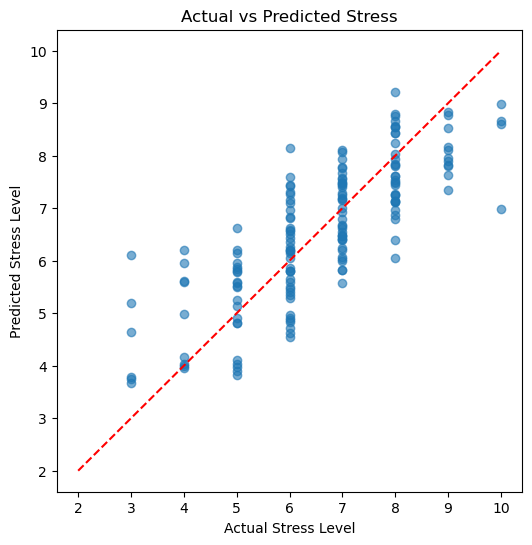

In [49]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Stress Level')
plt.ylabel('Predicted Stress Level')
plt.title('Actual vs Predicted Stress')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.show()


In [50]:
svm_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf', C=10.0, epsilon=0.2))
])

svm_reg.fit(X_train, y_train)
y_pred_svm = svm_reg.predict(X_test)

mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print('SVM Regressor Performance')
print('MSE:', mse_svm)
print('MAE:', mae_svm)
print('R^2:', r2_svm)


SVM Regressor Performance
MSE: 1.096634777273937
MAE: 0.8632414297816412
R^2: 0.5362121071972701


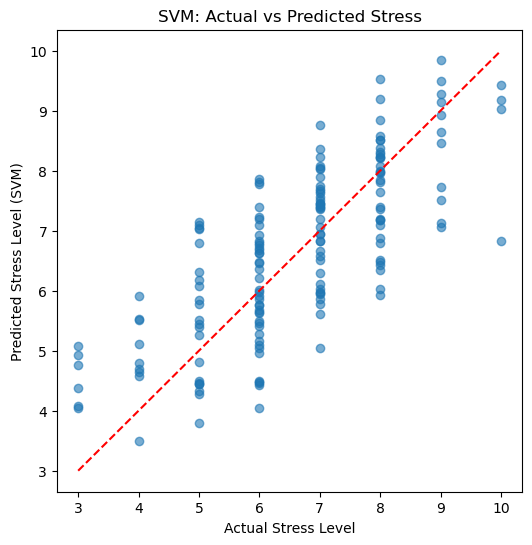

In [51]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_svm, alpha=0.6)
plt.xlabel('Actual Stress Level')
plt.ylabel('Predicted Stress Level (SVM)')
plt.title('SVM: Actual vs Predicted Stress')
min_val = min(y_test.min(), y_pred_svm.min())
max_val = max(y_test.max(), y_pred_svm.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.show()


In [52]:
ann_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(64,),
                         activation='relu',
                         solver='adam',
                         max_iter=500,
                         random_state=42))
])

ann_reg.fit(X_train, y_train)
y_pred_ann = ann_reg.predict(X_test)

mse_ann = mean_squared_error(y_test, y_pred_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print('ANN (MLPRegressor) Performance')
print('MSE:', mse_ann)
print('MAE:', mae_ann)
print('R^2:', r2_ann)


ANN (MLPRegressor) Performance
MSE: 1.0092715592751758
MAE: 0.8074375536582856
R^2: 0.5731596886745167


c:\Users\rajra\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


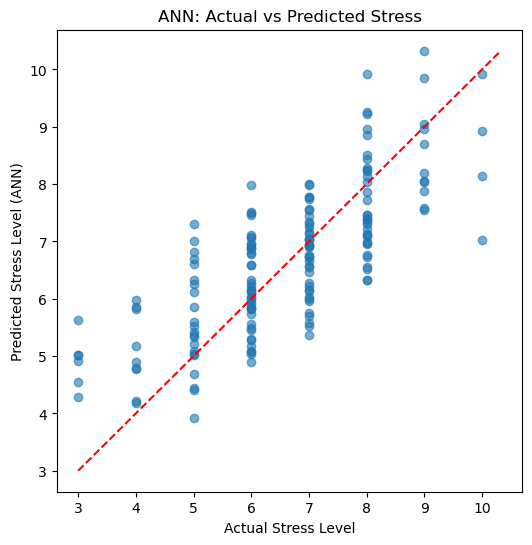

In [53]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ann, alpha=0.6)
plt.xlabel('Actual Stress Level')
plt.ylabel('Predicted Stress Level (ANN)')
plt.title('ANN: Actual vs Predicted Stress')
min_val = min(y_test.min(), y_pred_ann.min())
max_val = max(y_test.max(), y_pred_ann.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.show()


In [54]:
results = pd.DataFrame({
    'Model': ['RF Regressor','SVM Regressor', 'ANN (MLPRegressor)'],
    'MSE': [mse_rf,mse_svm, mse_ann],
    'MAE': [mae_rf,mae_svm, mae_ann],
    'R^2': [r2_rf,r2_svm, r2_ann]
})
results


,Model,MSE,MAE,R^2
0,RF Regressor,0.896888,0.774788,0.620689
1,SVM Regressor,1.096635,0.863241,0.536212
2,ANN (MLPRegressor),1.009272,0.807438,0.573160
